In [191]:
import pandas as pd
import numpy as np

In [192]:
df=pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [193]:
df.shape

(301, 9)

In [194]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [195]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())
print(df['Fuel_Type'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


In [196]:
# check missing and null value
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [165]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [166]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [167]:
final_dataset=df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [168]:
final_dataset['Current_Year']=2021
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [169]:
final_dataset['No_Year']=final_dataset['Current_Year']-final_dataset['Year']
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [170]:
final_dataset.drop(['Year'], axis=1, inplace=True)

In [171]:
final_dataset.drop(['Current_Year'], axis=1, inplace=True)

In [172]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_Year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [173]:
final_dataset=pd.get_dummies(final_dataset, drop_first=True)
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [174]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No_Year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [175]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

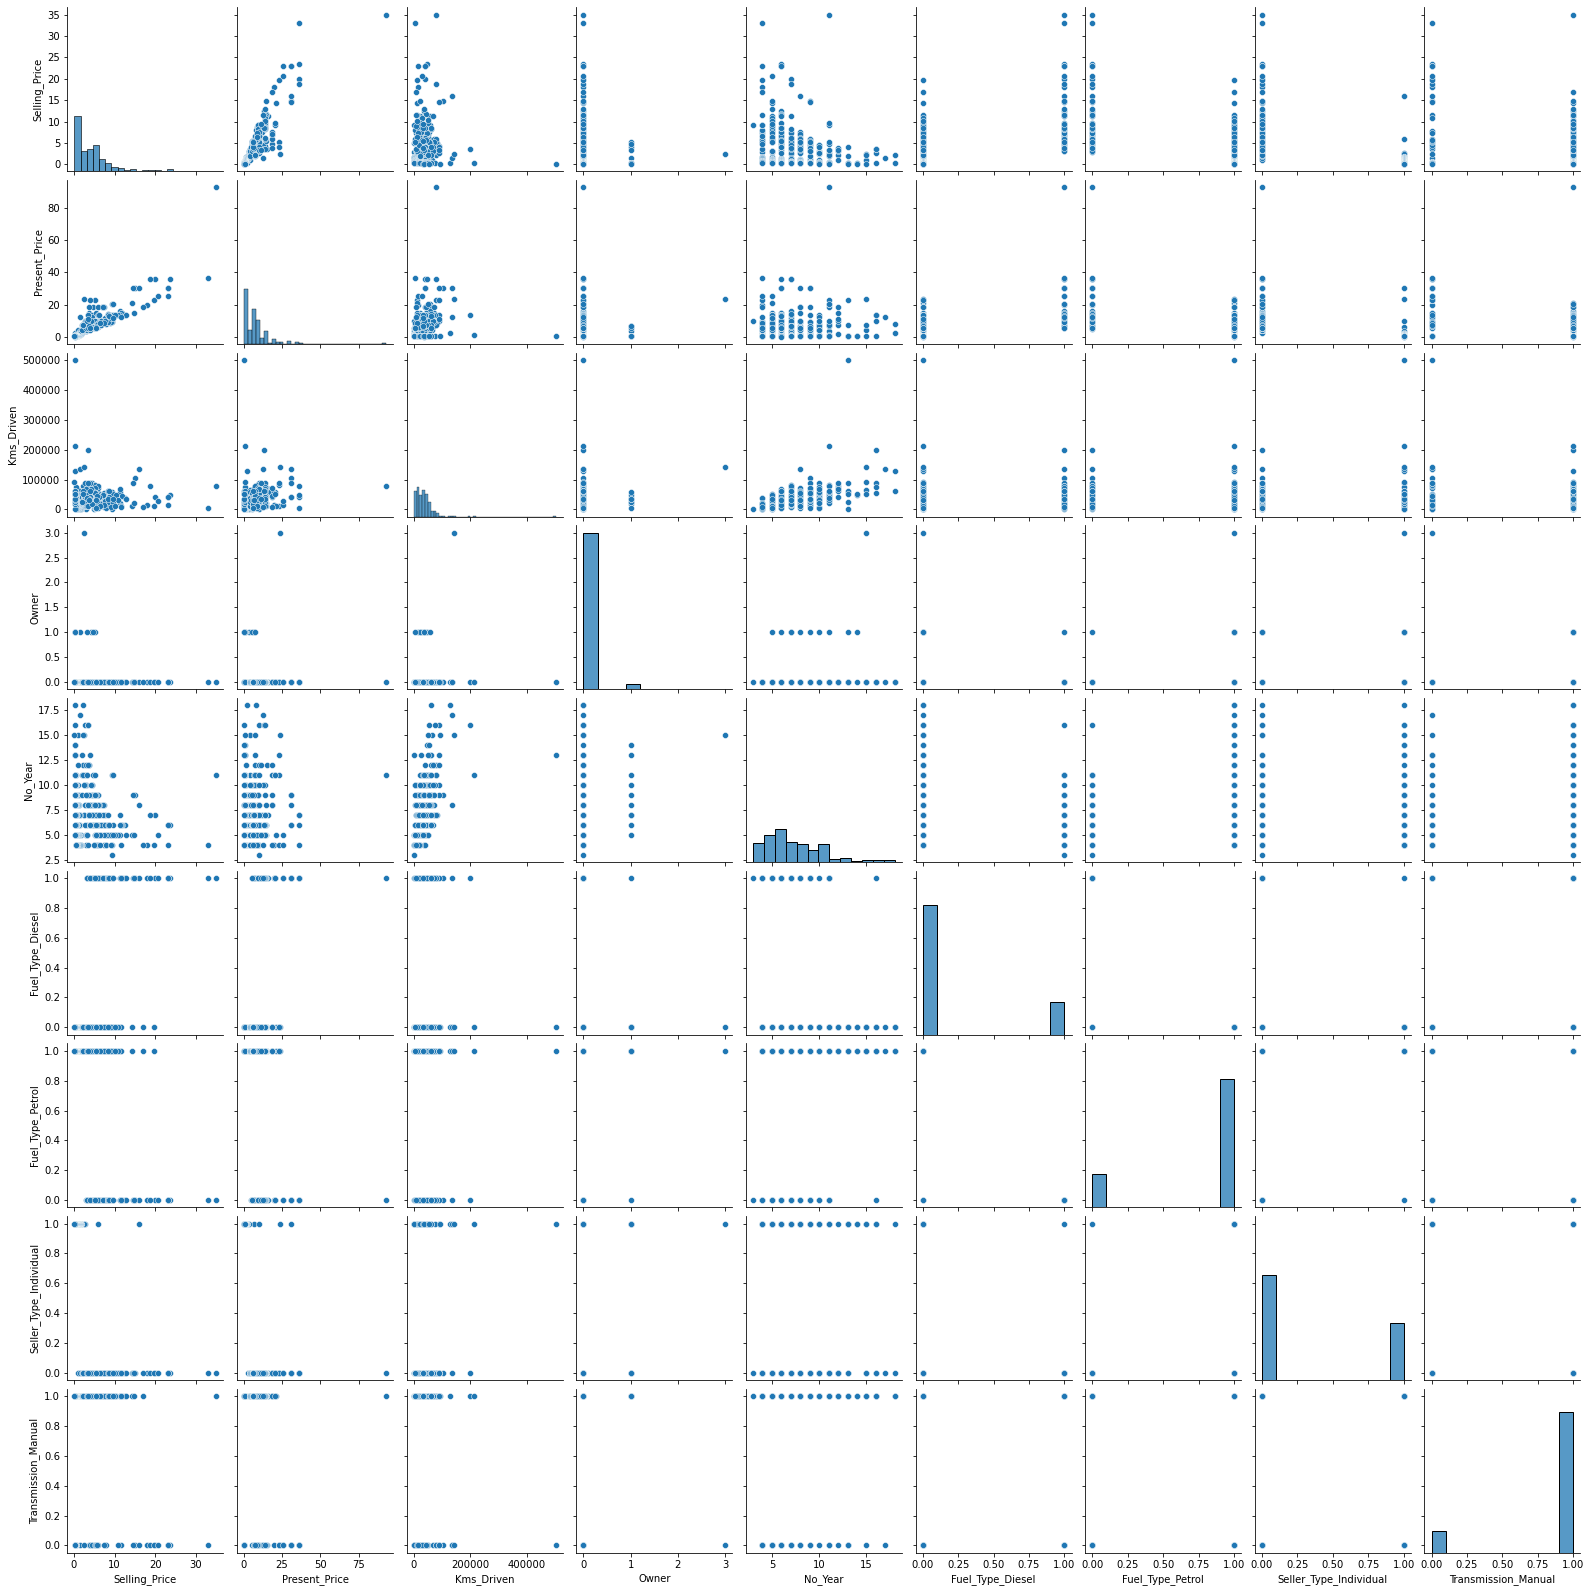

In [176]:
sns.pairplot(final_dataset)

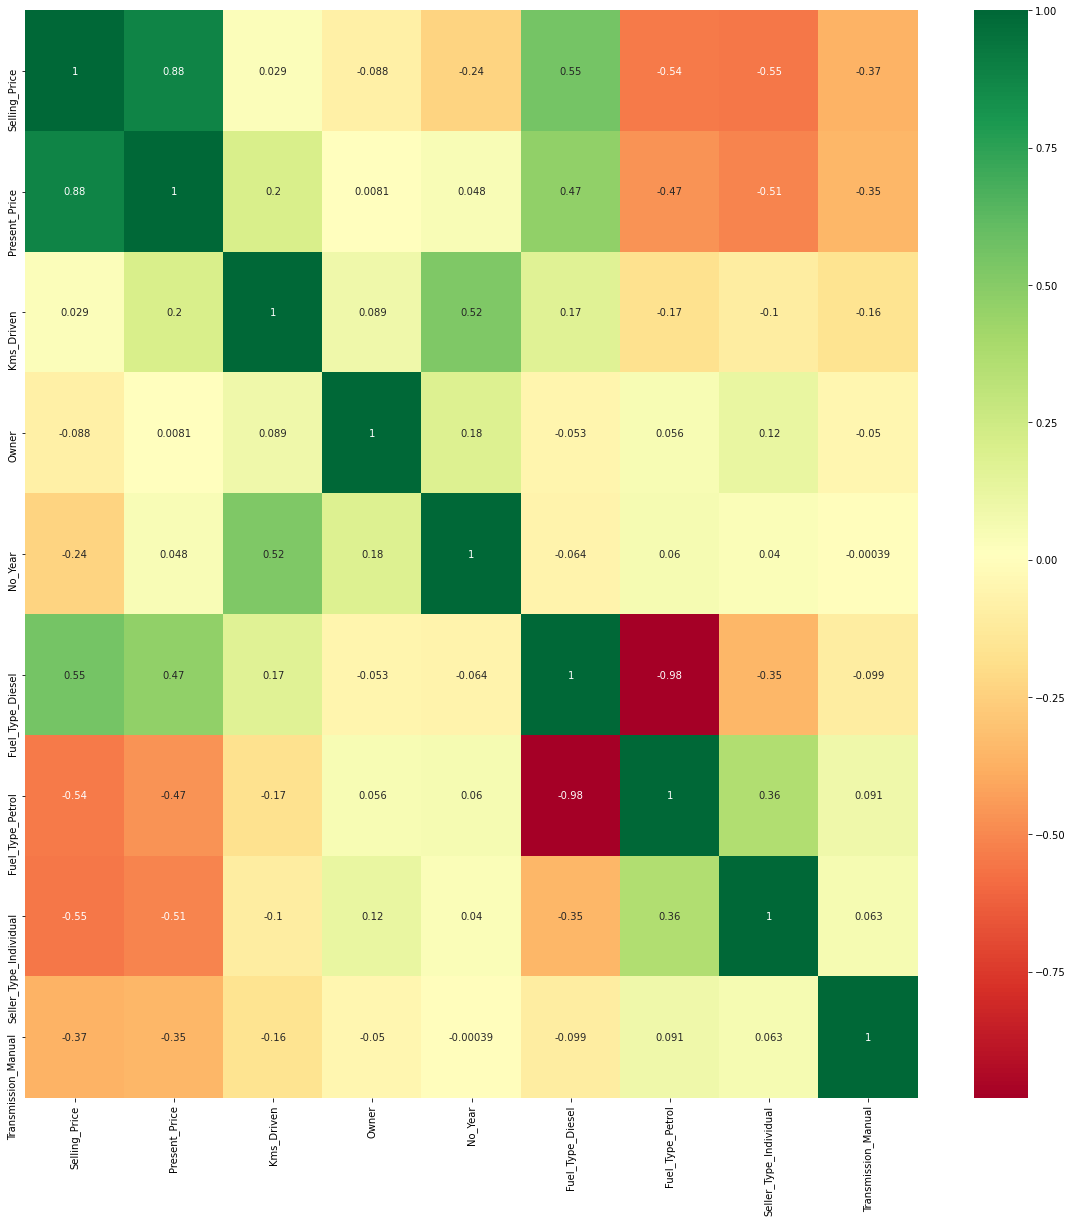

In [177]:
corr=final_dataset.corr()
top_corr_feature=corr.index
plt.figure(figsize=(20,20))
g=sns.heatmap(final_dataset[top_corr_feature].corr(), annot=True, cmap='RdYlGn')

In [178]:
final_dataset.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'No_Year',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

In [179]:
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [180]:
from sklearn.ensemble import ExtraTreesRegressor

In [181]:
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [182]:
print(model.feature_importances_)

[0.38081958 0.03741905 0.00127843 0.07955658 0.22950912 0.00932338
 0.1357591  0.12633475]


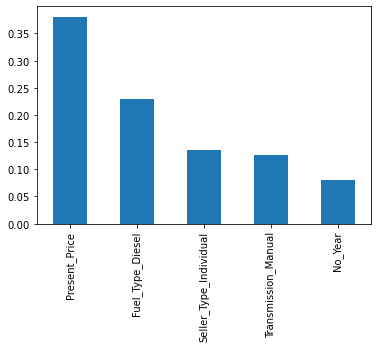

In [183]:
imp_feat=pd.Series(model.feature_importances_, index=X.columns)
imp_feat.nlargest(5).plot(kind='bar')
plt.show()

In [184]:
from sklearn.model_selection import train_test_split

In [185]:
x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.2)

In [186]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(240, 8)
(61, 8)
(240,)
(61,)


In [187]:
from sklearn.ensemble import RandomForestRegressor

In [188]:
rf_random=RandomForestRegressor()

In [212]:
#hyperparameter
#no of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,  stop=1200, num=12)]
#no of feature to consider at every split
max_features=['auto','sqrt']
#max no level in trees
max_depth=[int(x) for x in np.linspace(5,30, num=6)]
#min sample split
min_samples_split=[2,5,10,15,100]
#min no of sample req to each leaf
min_samples_leaf=[1,2,5,10]

In [213]:
from sklearn.model_selection import RandomizedSearchCV

In [214]:
random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [215]:
rf=RandomForestRegressor()

In [218]:
rf_random=RandomizedSearchCV(estimator=rf, param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10, cv=5,verbose=10, random_state=42, n_jobs=1)

In [220]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900
[CV 1/5; 1/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV 2/5; 1/10] START max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900
[CV 2/5; 1/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV 3/5; 1/10] START max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900
[CV 3/5; 1/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV 4/5; 1/10] START max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900
[CV 4/5; 1/10] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estima

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=10)

In [221]:
prediction=rf_random.predict(x_test)

In [222]:
prediction

array([ 4.73145  ,  3.0445   ,  0.62518  ,  0.49284  ,  1.37541  ,
        0.53314  ,  6.9784   ,  1.23913  ,  0.45206  ,  5.19965  ,
        7.24227  ,  0.84792  ,  0.29751  ,  0.52544  ,  5.4094   ,
        0.46994  ,  0.5194   ,  0.55755  ,  5.03431  ,  0.62899  ,
        0.58822  ,  4.55828  ,  1.43661  ,  5.4608   ,  4.43845  ,
        1.05943  ,  8.56415  ,  0.24519  ,  8.01539  ,  5.3924   ,
        7.9316875,  7.7189175,  5.29434  , 10.85579  ,  5.53975  ,
        0.35019  ,  5.5476   ,  0.37085  ,  3.8018   ,  1.08882  ,
        0.41604  ,  1.37847  ,  0.42304  ,  3.4622   ,  0.96676  ,
        4.91865  ,  5.6895   ,  5.69423  , 20.9726   ,  5.9185   ,
        2.35222  ,  8.58951  ,  0.58021  ,  0.49152  ,  8.56415  ,
        5.46119  ,  0.29149  ,  1.023    ,  0.59453  ,  5.43965  ,
        0.78984  ])

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

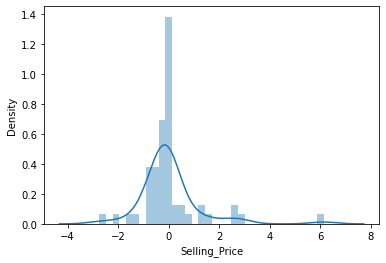

In [224]:
sns.distplot(y_test-prediction)

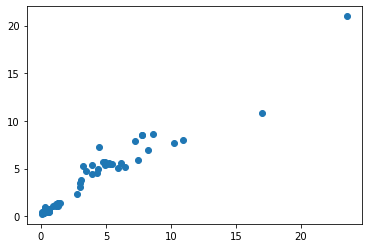

In [225]:
plt.scatter(y_test,prediction)

In [226]:
import pickle
file=open('random_forest_regression_model.pkl','wb')
pickle.dump(rf_random, file)